In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from collections import Counter


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_excel("DA -Task 2..xlsx", sheet_name='Sheet1')

#overview of data-set
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (100, 52)

First few rows:


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


## Column wise Analysis

In [9]:
# Basic infor about data-Set
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Total records: {len(df)}")

# Data types and missing values
print("\n=== DATA TYPES AND MISSING VALUES ===")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df)) * 100,
    'Unique Values': df.nunique()
})
df_info

=== DATASET OVERVIEW ===
Shape: (100, 52)
Columns: 52
Total records: 100

=== DATA TYPES AND MISSING VALUES ===


,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Values
VIN,object,100,0,0.0,98
TRANSACTION_ID,int64,100,0,0.0,32
CORRECTION_VERBATIM,object,100,0,0.0,93
CUSTOMER_VERBATIM,object,100,0,0.0,100
REPAIR_DATE,datetime64[ns],100,0,0.0,29
CAUSAL_PART_NM,object,95,5,5.0,18
GLOBAL_LABOR_CODE_DESCRIPTION,object,100,0,0.0,4
PLATFORM,object,100,0,0.0,11
BODY_STYLE,object,100,0,0.0,6
VPPC,object,100,0,0.0,26


In [10]:
#Column-wise analysis
def analyze_column(column_name):
    print(f"\n=== ANALYSIS OF: {column_name} ===")
    print(f"Data type: {df[column_name].dtype}")
    print(f"Unique values: {df[column_name].nunique()}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    
    if df[column_name].dtype in ['object', 'category']:
        print("\nTop 10 values:")
        print(df[column_name].value_counts().head(10))
    else:
        print(f"Min value: {df[column_name].min()}")
        print(f"Max value: {df[column_name].max()}")
    
    return df_info

key_columns = ['REPAIR_DATE', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 
               'STATE', 'TOTALCOST', 'ENGINE_DESC', 'COMPLAINT_CD']

for col in key_columns:
    if col in df.columns:
        analyze_column(col)


=== ANALYSIS OF: REPAIR_DATE ===
Data type: datetime64[ns]
Unique values: 29
Missing values: 0
Min value: 2024-01-02 00:00:00
Max value: 2024-02-07 00:00:00

=== ANALYSIS OF: GLOBAL_LABOR_CODE_DESCRIPTION ===
Data type: object
Unique values: 4
Missing values: 0

Top 10 values:
GLOBAL_LABOR_CODE_DESCRIPTION
Steering Wheel Replacement                               78
Steering Wheel Spoke Cover Replacement                   11
Heated Steering Wheel Module Replacement                  6
Steering Wheel Horn Switch Wiring Harness Replacement     5
Name: count, dtype: int64

=== ANALYSIS OF: PLATFORM ===
Data type: object
Unique values: 11
Missing values: 0

Top 10 values:
PLATFORM
Full-Size Trucks             52
Full-Size Utility            13
Crossover SUV                11
Global Gamma                  7
Global Crossover Vehicles     7
BEV                           5
Luxury Car-3                  1
Global Gamma Vehicles         1
GLOBAL EPSILON II             1
Alpha                      

## Data Cleaning


In [12]:
print("=== DATA CLEANING ===")

#Handling missing values
print("Missing values before cleaning:")
missing_before = df.isnull().sum().sum()
print(f"Total missing values: {missing_before}")

#Filling missing categorical values with 'Unknown'
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

#Filling missing numerical values with median
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

print(f"Missing values after cleaning: {df.isnull().sum().sum()}")

#function to format the the column properly and removing sapces
def clean_categorical(column):
    if column in df.columns and df[column].dtype == 'object':
        df[column] = df[column].str.strip().str.upper()
    return df

#Cleaning key categorical columns
columns_to_clean = ['PLATFORM', 'STATE', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'BODY_STYLE']
for col in columns_to_clean:
    df = clean_categorical(col)

print("Categorical data standardized")

=== DATA CLEANING ===
Missing values before cleaning:
Total missing values: 100
Missing values after cleaning: 100
Categorical data standardized


## Identifying critical columns and Visulaisation

=== CRITICAL COLUMNS SELECTION ===
Top 5 Critical Columns Selected:
- PLATFORM: Shows which vehicle platforms have most steering wheel issues
- GLOBAL_LABOR_CODE_DESCRIPTION: Types of repairs being performed
- TOTALCOST: Financial impact of repairs
- REPAIR_AGE: Age of vehicle when repair was needed
- STATE: Geographical distribution of issues


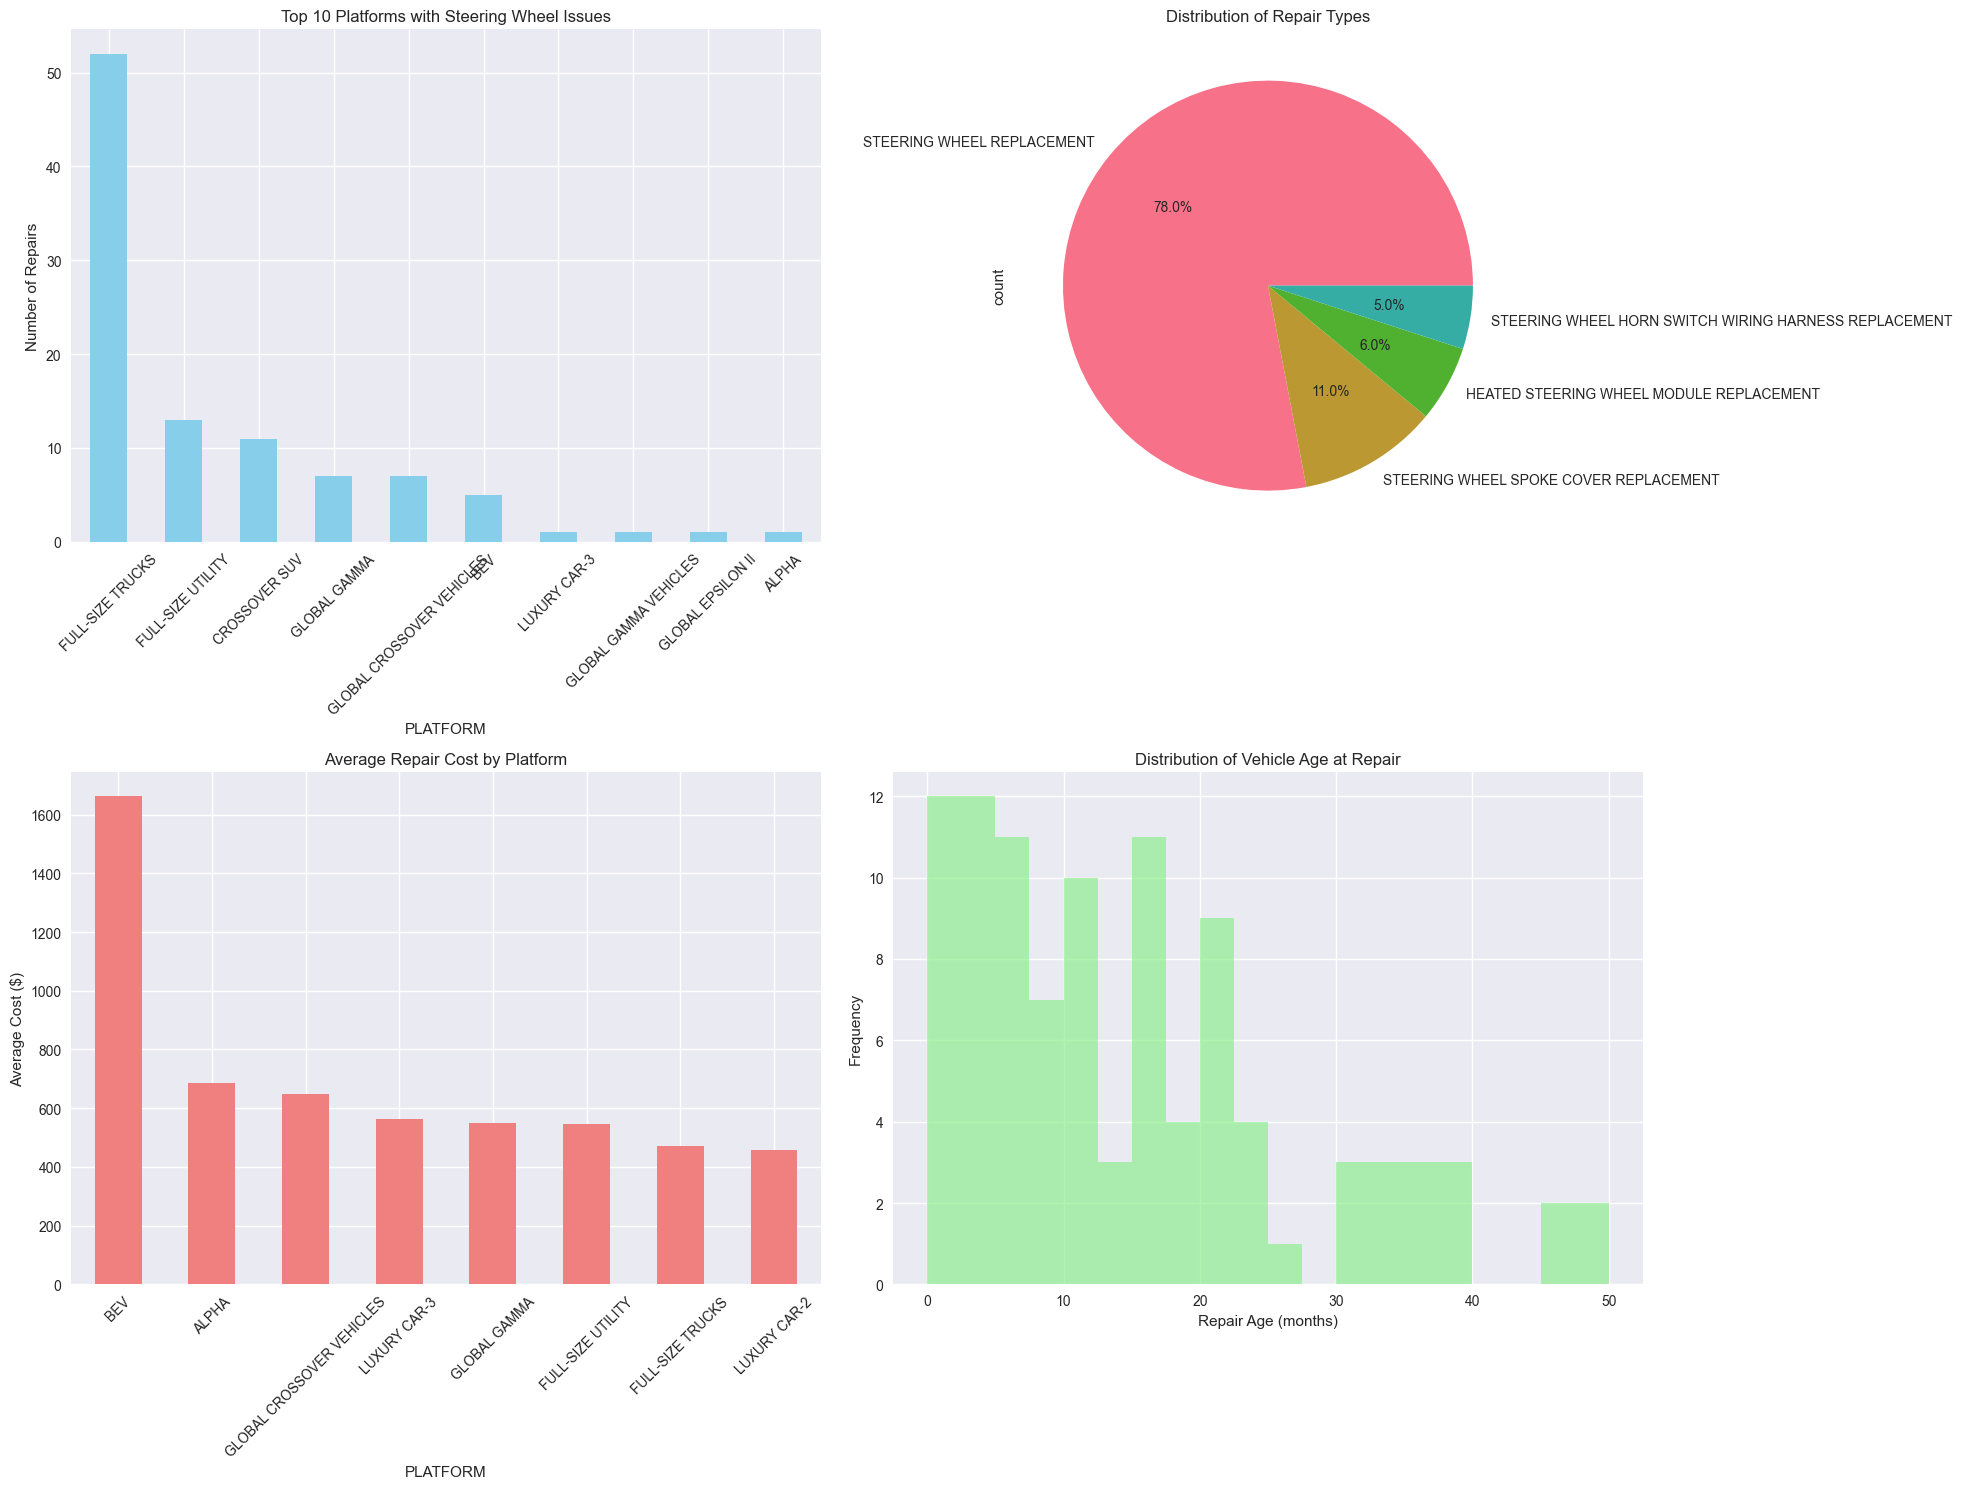

In [13]:
print("=== CRITICAL COLUMNS SELECTION ===")

# Select top 5 critical columns
critical_columns = {
    'PLATFORM': 'Shows which vehicle platforms have most steering wheel issues',
    'GLOBAL_LABOR_CODE_DESCRIPTION': 'Types of repairs being performed',
    'TOTALCOST': 'Financial impact of repairs',
    'REPAIR_AGE': 'Age of vehicle when repair was needed',
    'STATE': 'Geographical distribution of issues'
}

print("Top 5 Critical Columns Selected:")
for col, reason in critical_columns.items():
    print(f"- {col}: {reason}")

#Platform Distribution
plt.figure(figsize=(20, 15))
platform_counts = df['PLATFORM'].value_counts().head(10)
plt.subplot(2, 2, 1)
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Platforms with Steering Wheel Issues')
plt.xticks(rotation=45)
plt.ylabel('Number of Repairs')

# Repair Type Distribution
plt.subplot(2, 2, 2)
repair_types = df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().head(8)
repair_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Repair Types')

#Cost Analysis by Platform
plt.subplot(2, 2, 3)
cost_by_platform = df.groupby('PLATFORM')['TOTALCOST'].mean().sort_values(ascending=False).head(8)
cost_by_platform.plot(kind='bar', color='lightcoral')
plt.title('Average Repair Cost by Platform')
plt.xticks(rotation=45)
plt.ylabel('Average Cost ($)')

# Repair Age Distribution
plt.subplot(2, 2, 4)
plt.hist(df['REPAIR_AGE'].dropna(), bins=20, color='lightgreen', alpha=0.7)
plt.title('Distribution of Vehicle Age at Repair')
plt.xlabel('Repair Age (months)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Generating Tags from Free Text

Failure Mode Analysis:
electrical: 21 occurrences
trim_issue: 14 occurrences
coming_apart: 13 occurrences
peeling: 11 occurrences
loose: 10 occurrences
stitching: 9 occurrences
noise: 4 occurrences
heating_issue: 2 occurrences


C:\Users\Sooraj\AppData\Local\Temp\ipykernel_11192\3848061266.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=failure_df, x='Count', y='Failure Mode', palette='tab10')


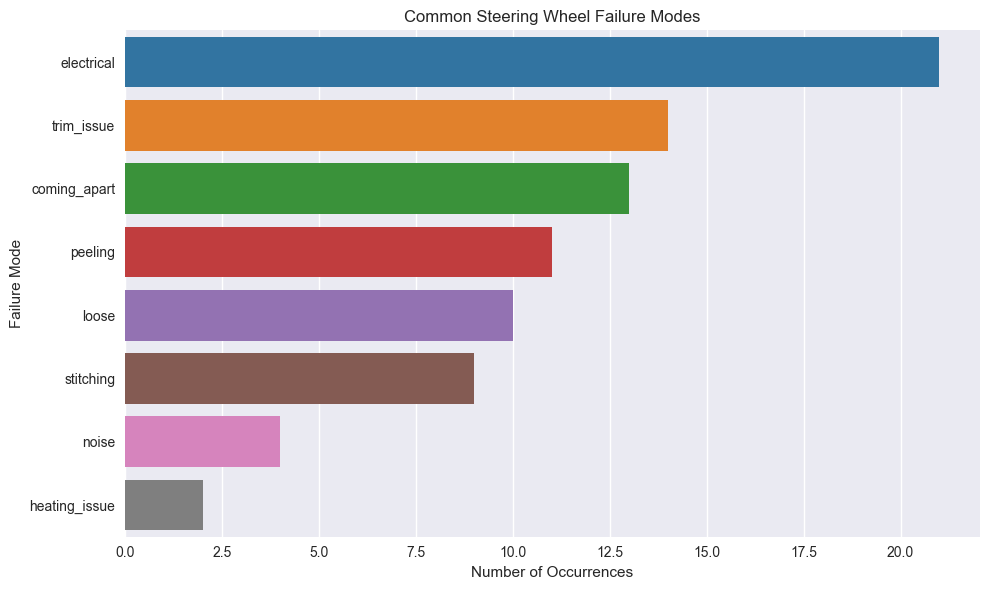

In [14]:


def extract_failure_modes(text):
    #Extracting failure modes from customer comments
    if pd.isna(text):
        return []
    
    text = str(text).lower()
    failure_modes = []
    
    # Common failure patterns
    patterns = {
        'coming_apart': ['coming apart', 'falling apart', 'falling off', 'pulling apart'],
        'peeling': ['peeling', 'delamination', 'bubbling'],
        'heating_issue': ['not heating', 'not warm', 'heating issue', 'wont heat'],
        'stitching': ['stitching', 'stitch', 'seam'],
        'loose': ['loose', 'wobbly', 'not secure'],
        'noise': ['noise', 'clicking', 'rubbing', 'rattling'],
        'electrical': ['light', 'message', 'warning', 'code', 'inop', 'not working'],
        'trim_issue': ['trim', 'bezel', 'molding', 'cover']
    }
    
    for mode, keywords in patterns.items():
        if any(keyword in text for keyword in keywords):
            failure_modes.append(mode)
    
    return failure_modes

# Apply function to customer comments
df['FAILURE_MODES'] = df['CUSTOMER_VERBATIM'].apply(extract_failure_modes)

#count failure modes
all_failure_modes = [mode for sublist in df['FAILURE_MODES'] for mode in sublist]
failure_mode_counts = Counter(all_failure_modes)

print("Failure Mode Analysis:")
for mode, count in failure_mode_counts.most_common():
    print(f"{mode}: {count} occurrences")

# Visualization of failure modes
plt.figure(figsize=(10, 6))
failure_df = pd.DataFrame(failure_mode_counts.most_common(), columns=['Failure Mode', 'Count'])
sns.barplot(data=failure_df, x='Count', y='Failure Mode', palette='tab10')
plt.title('Common Steering Wheel Failure Modes')
plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.show()

## Summary and Insights

In [15]:

print("KEY FINDINGS:")
print(f"1. Total records analyzed: {len(df)}")
print(f"2. Most common platform with issues: {df['PLATFORM'].mode().iloc[0]}")
print(f"3. Most frequent repair type: {df['GLOBAL_LABOR_CODE_DESCRIPTION'].mode().iloc[0]}")
print(f"4. Average repair cost: ${df['TOTALCOST'].mean():.2f}")
print(f"5. Most common failure mode: {failure_mode_counts.most_common(1)[0][0]}")


print("\nACTIONABLE RECOMMENDATIONS:")
print("1. QUALITY IMPROVEMENT: Focus on steering wheel stitching and trim adhesion for Full-Size Trucks")
print("2. COST REDUCTION: Investigate why BEV platforms have higher average repair costs")
print("3. WARRANTY ANALYSIS: Review repair patterns for vehicles under 12 months old")
print("4. SUPPLIER MANAGEMENT: Address component quality issues with steering wheel suppliers")
print("5. TECHNICAL TRAINING: Enhance technician training for electrical diagnostics")

print("\nDATA QUALITY ISSUES IDENTIFIED:")
print(f"1. Missing VIN values: {df['VIN'].isnull().sum()}")
print(f"2. Missing repair dates: {df['REPAIR_DATE'].isnull().sum()}")
print(f"3. Inconsistent state codes: {df['STATE'].nunique()} unique values")
print(f"4. Cost outliers: {len(df[df['TOTALCOST'] > df['TOTALCOST'].quantile(0.99)])} extreme values")


KEY FINDINGS:
1. Total records analyzed: 100
2. Most common platform with issues: FULL-SIZE TRUCKS
3. Most frequent repair type: STEERING WHEEL REPLACEMENT
4. Average repair cost: $554.93
5. Most common failure mode: electrical

ACTIONABLE RECOMMENDATIONS:
1. QUALITY IMPROVEMENT: Focus on steering wheel stitching and trim adhesion for Full-Size Trucks
2. COST REDUCTION: Investigate why BEV platforms have higher average repair costs
3. WARRANTY ANALYSIS: Review repair patterns for vehicles under 12 months old
4. SUPPLIER MANAGEMENT: Address component quality issues with steering wheel suppliers
5. TECHNICAL TRAINING: Enhance technician training for electrical diagnostics

DATA QUALITY ISSUES IDENTIFIED:
1. Missing VIN values: 0
2. Missing repair dates: 0
3. Inconsistent state codes: 40 unique values
4. Cost outliers: 1 extreme values
